#### Recap: properties of delta function

`Sampling`

$$\boxed{f\delta = f(0)\delta}$$

$$\boxed{f\delta_a = f(a)\delta_a}$$

`Shifting`

$$\boxed{f * \delta =f}$$

$$\boxed{(f*\delta_a)(x) = f(x-a)}$$

`Scaling`

$$\boxed{\delta(ax)=\frac{1}{|a|}\delta(x)}$$

#### `Setup` for Shah function

A function $\rho(x)$ that is `periodized` with period $p$

An example is 1D crystal where a long sequence of atoms are placed $p$ apart, and we want to study `electron density distribution` for `individual atom` $\rho(x)$, which is `periodized` over entire crystal

$$\rho_p(x)=\sum_{k=-\infty}^{\infty}\rho(x-kp)$$

The far-field X-ray `diffraction pattern` over 1D crystal should be `Fourier transform` of this periodized function $F\rho_p$, so, what is it?

#### `Shah` function

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

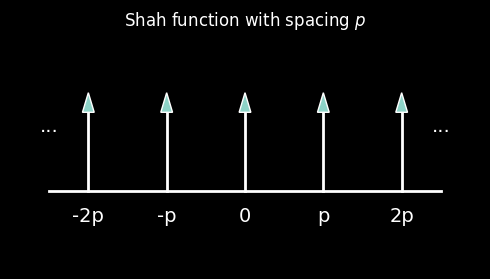

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot([-5, 5], [-2,-2], 'w', linewidth=2, zorder=0)
for i,j in zip([-4, -2, 0, 2, 4], ['-2p', '-p', '0', 'p', '2p']):
    ax.plot([i,i], [-2,0], 'w', linewidth=2, zorder=0)
    ax.text(i, -2.8, j, horizontalalignment='center',fontsize=14)
    ax.arrow(i, 0, 0.000, 0.001, head_width=0.3, head_length=0.5)

ax.text(-5, -0.5, '...', horizontalalignment='center',fontsize=14)
ax.text(5, -0.5, '...', horizontalalignment='center',fontsize=14)

ax.set_xlim(-6, 6)
ax.set_ylim(-4, 2)
ax.set_aspect('equal')

ax.set_title('Shah function with spacing $p$')
ax.axis("off")
plt.tight_layout()

plt.show()

Compare the `periodized` function $\rho_p(x)$ and `shifting` property of $\delta$, we see we can write $\rho_p(x)$ as `convolution` with a sequence of `delta` functions

$$\begin{align*}
\rho_p(x) &= \sum_{k=-\infty}^{\infty}\rho(x-kp) \\
&= \left(\rho * \sum_{k=-\infty}^{\infty}\delta_{kp}\right) (x) \\
& \text{define Shah function } \text{III}_p =\sum_{k=-\infty}^{\infty}\delta_{kp} \\
&=\rho * \text{III}_p
\end{align*}$$

For clarity and without causing confusion, we can write

$$\boxed{\text{III}_p(x) =\sum_{k=-\infty}^{\infty}\delta(x-kp)}$$

Pictorial depiction is just a `sequence of spikes` (delta functions), each distance $p$ away from the next, it is often refered to as `Dirac comb` with spacing $p$

Using `convolution theorem`

$$F\rho_p=(F\rho)(F\text{III}_p)$$

The question is, what is $F\text{III}_p$?

#### Start with `special case` of $p=1$

$$\text{III}(x) =\sum_{k=-\infty}^{\infty}\delta(x-k)$$

You `may think` that we can simply use

$$F\text{III}=\sum_{-\infty}^{\infty}F\delta_k=\sum_{-\infty}^{\infty}e^{-2\pi i k s}$$

But the series on the right hand side does not converge in classical sense...

So, need to think differently

We can see that $\text{III}$ makes sense as `distribution`

$$\begin{align*}
\langle \text{III}, \varphi \rangle &=\langle \sum_{k=-\infty}^{\infty}\delta(x-k), \varphi \rangle \\
& \text{linearity and convergence of rapidly decreasing } \varphi \\
&=\sum_{k=-\infty}^{\infty}\varphi(k)
\end{align*}$$

All is well, the output is the `sum of test function at integer points`

Its Fourier transform also makes sense as `distribution`

$$\begin{align*}
\langle F\text{III}, \varphi \rangle &= \langle \text{III}, F\varphi \rangle\\
&=\sum_{k=-\infty}^{\infty}F\varphi(k)
\end{align*}$$

Same as before, just the test function becomes $F\varphi$

So, are these two related?

#### `Poisson summation` formula

If $\varphi$ is a `rapidly decreasing functions`, then

$$\boxed{\sum_{k=-\infty}^{\infty}\varphi(k)=\sum_{k=-\infty}^{\infty}F\varphi(k)}$$

To see this, we `periodize` $\varphi$ to have period of `1`

$$\begin{align*}
\Phi(x) &= \sum_{-\infty}^{\infty}\varphi(x-k) \text{ (converges due to rapidly decreasing }  \varphi)\\
&=\sum_{-\infty}^{\infty}c_k e^{2\pi i kx} \text{    (Fourier series)} \\
& c_k=F\varphi(k) \text{    (To show next)}\\
&=\sum_{-\infty}^{\infty}F\varphi(k)\,e^{2\pi i kx}
\end{align*}$$

To show $c_k=F\varphi(k)$

$$\begin{align*}
c_k&= \int_0^1 e^{-2\pi i kx}\Phi(x)\,dx \\
&=\int_0^1 \sum_{m=-\infty}^{\infty}e^{-2\pi i kx} \varphi(x-m)\,dx \\
&=\sum_{m=-\infty}^{\infty}\int_0^1 e^{-2\pi i kx} \varphi(x-m)\,dx \\
&=\sum_{m=-\infty}^{\infty}\int_{-m}^{-m+1} e^{-2\pi i k(x+m)} \varphi(x)\,dx
 \,\,\text{(any interval of 1 works)}\\
&=\sum_{m=-\infty}^{\infty}\int_{-m}^{-m+1} e^{-2\pi i kx}e^{-2\pi i km} \varphi(x)\,dx \\
&=\int_{-\infty}^{\infty} e^{-2\pi i kx}1 \varphi(x)\,dx \\
&=F\varphi(k)
\end{align*}$$

Put two expressions for the same $\Phi(x)$

$$\begin{align*}
\Phi(x) &=\sum_{-\infty}^{\infty}\varphi(x-k) \\
&=\sum_{-\infty}^{\infty}F\varphi(k)\,e^{2\pi i kx}
\end{align*}$$

If we evalute them at $x=0$

$$\Phi(0)=\sum_{-\infty}^{\infty}\varphi(-k)=\sum_{-\infty}^{\infty}F\varphi(k)1$$

We have `Poisson formula`

$$\sum_{-\infty}^{\infty}\varphi(k)=\sum_{-\infty}^{\infty}F\varphi(k)$$

#### Back to `Shah` function

We have

$$\begin{align}
\langle \text{III}, \varphi \rangle &=\sum_{k=-\infty}^{\infty}\varphi(k)
\end{align}$$

and

$$\begin{align}
\langle F\text{III}, \varphi \rangle =\sum_{k=-\infty}^{\infty}F\varphi(k)
\end{align}$$

Therefore

$$\boxed{F\text{III}=\text{III}}$$

#### Use `scaling property` of delta function to analyze `general` $\text{III}_p$

$$\begin{align*}
F\text{III}_p&=F\sum_{-\infty}^{\infty}\delta(x-kp) \\
&=F\sum_{-\infty}^{\infty}\color{orange}{\delta\left(p\left(\frac{x}{p}-k\right)\right)} \\
&=F\sum_{-\infty}^{\infty}\color{orange}{\frac{1}{p}\delta\left(\frac{x}{p}-k\right)}\\
&=\frac{1}{p}F\color{red}{\sum_{-\infty}^{\infty}\delta\left(\frac{x}{p}-k\right)} \\
&=\frac{1}{p}F\left(\color{red}{\text{III}\left(\frac{x}{p}\right)}\right) \\
& \text{scaling property of Fourier transform} \\
&= \frac{1}{p}pF\text{III}(ps) \\
&= F\text{III}(ps) \\
&=\text{III}(ps) \\
&=\sum_{-\infty}^{\infty}\delta(ps-k) \\
&=\sum_{-\infty}^{\infty}\delta\left(p\left(s-\frac{k}{p}\right)\right) \\
&=\frac{1}{p}\sum_{-\infty}^{\infty}\delta\left(s-\frac{k}{p}\right) \\
&=\frac{1}{p}\text{III}_{\frac{1}{p}}
\end{align*}$$

That is

$$\boxed{F\text{III}_p (s)=\frac{1}{p}\text{III}_{\frac{1}{p}}(s)} $$

#### Back to `diffraction pattern` of 1D crystal

$$\begin{align*}F\rho_p&=(F\rho)(F\text{III}_p) \\
&=F\rho(s) \cdot \frac{1}{p}\text{III}_{\frac{1}{p}}(s) \\
&=\frac{1}{p}F\rho(s) \cdot \sum_{-\infty}^{\infty}\delta\left(s-\frac{k}{p}\right) \\
& \text{sampling property of delta function} \\
&=\frac{1}{p}\sum_{-\infty}^{\infty}F\rho\left(\frac{k}{p}\right)\delta\left(s-\frac{k}{p}\right)
\end{align*}$$

So the spacing of the spots in diffraction pattern is `reciprocal` to the spacing in the crystal atom